<a href="https://colab.research.google.com/github/saimani5/ML-ElectronMicroscopy-2023/blob/main/11_DCNN_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lecture 11. Deep convolutional Neural Networks

Based on the
- Rowel Atienza book: https://subscription.packtpub.com/book/programming/9781838821654/pref
and
- Francois Chollet book: https://livebook.manning.com/book/deep-learning-with-python-second-edition/deep-learning-with-python/

# First look at the neural network

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import the MNIST dataset from tensorflow.keras.datasets
from tensorflow.keras.datasets import mnist

# Load the dataset. The MNIST dataset is divided into a set of 60,000 training images
# and a set of 10,000 testing images. Each image is represented as 28 x 28 pixels.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Print the shape of the training set. This will output (60000, 28, 28), indicating
# there are 60,000 images in the training set, each image being 28 x 28 pixels.
print(train_images.shape)

# Print the length of the training labels. This will output 60000, indicating there
# are 60,000 labels in the training set.
print(len(train_labels))
print('The first five training labels are: ', train_labels[0:5])

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
60000
The first five training labels are:  [5 0 4 1 9]


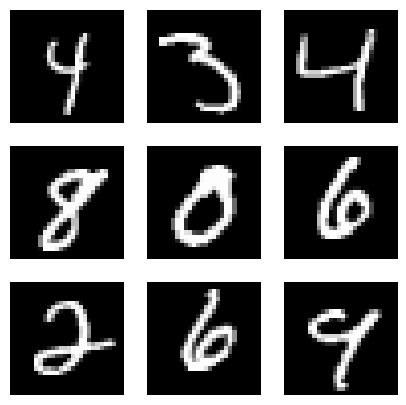

In [ ]:
# Import the matplotlib
import matplotlib.pyplot as plt

# Create a 3x3 grid of subplots. `fig` represents the whole figure, and `ax` is
# an array containing each subplot (or "axes"). The `figsize` parameter sets
# the size of the figure.
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (5,5))

# reproducibility.
np.random.seed(0)

# Generate an array of 9 random indices, each between 0 and 99 (inclusive).
# The `choice` function randomly selects 9 values from the array produced by
# np.arange(100). `replace=False` ensures that each value is unique (no repeats).
inds = np.random.choice(np.arange(100), size = 9, replace = False)

# Loop through each of the axes (i.e., each subplot in our 3x3 grid).
# `enumerate` is a built-in function of Python.
# (here, `i` is the counter, and `ax0` is the current subplot).
for i, ax0 in enumerate(ax.flatten()):
    # Display an image from the training set on each subplot. The index of the
    # image is taken from our randomly generated list of indices (`inds`). The
    # `cmap='gray'` parameter means that the images will be displayed in grayscale.
    ax0.imshow(train_images[inds[i]], cmap = 'gray')

    # Remove the axes from each subplot for a cleaner look.
    ax0.axis('off')


In [ ]:
# Keras is a user-friendly
# neural network library written in Python.
from tensorflow import keras
from tensorflow.keras import layers

# Define the architecture of the neural network. We're using a sequential model,
# which is a linear stack of layers. The model has two layers:
#   1. A dense (fully connected) layer with 512 neurons and ReLU activation.
        # Here we use the "late variable creation"
#   2. Another dense layer with 10 neurons (one for each class) and softmax activation,
#      which will output a probability distribution over the 10 classes.
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model. This is where we specify the optimizer, loss function, and metrics
# that we'll use for training. Here, we're using RMSprop as the optimizer,
# sparse_categorical_crossentropy as the loss function, and accuracy as the metric.
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Preprocess the training images: flatten them into vectors and scale the pixel values
# to be between 0 and 1. Each image originally is 28x28 pixels, so after reshaping,
# each image becomes a 1D array of 784 (28*28) elements.
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

# Do the same preprocessing for the test images.
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255


In [ ]:
# Train the model for a specified number of epochs

model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 4ms/step - loss: 0.2682 - accuracy: 0.9233
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1078 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0708 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0510 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0386 - accuracy: 0.9890


313/313 [==============================] - 1s 2ms/step
Shape of predictions:  (10000, 10)


(-0.5, 27.5, 27.5, -0.5)

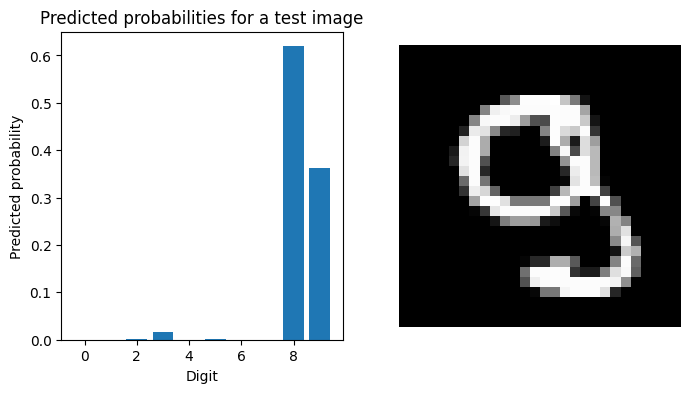

In [ ]:
# Predict the labels for all test images
test_digits = test_images
predictions = model.predict(test_digits)

# Print the shape of the predictions array
print('Shape of predictions: ', predictions.shape)

# Initialize a subplot with 2 columns: one for the predicted probabilities and one for the actual image
fig, ax = plt.subplots(ncols = 2, figsize=(8, 4))

# In the first subplot, plot the prediction probabilities for a test image
ax[0].bar(range(10), predictions[151])
ax[0].set_title("Predicted probabilities for a test image")
ax[0].set_xlabel("Digit")
ax[0].set_ylabel("Predicted probability")

# In the second subplot, show the actual image corresponding to these predictions
ax[1].imshow(test_images[151].reshape([28,28]), cmap='gray')
ax[1].axis('off')

In [ ]:
# Get the predicted class labels: the class with the highest probability for each image
labels_pred = predictions.argmax(axis = 1)
# Print the predicted labels for the first 10 images
print(labels_pred[0:10])

# Evaluate the model on the test set - this gives us our final accuracy and loss values
test_loss, test_acc = model.evaluate(test_images, test_labels)
# Print the test accuracy
print(f"test_acc: {test_acc}")

[7 2 1 0 4 1 4 9 5 9]
313/313 [==============================] - 1s 2ms/step - loss: 0.0668 - accuracy: 0.9773
test_acc: 0.9772999882698059


In [ ]:
print(train_images.ndim )
print(train_images.shape)
print(train_images.dtype)

2
(60000, 784)
float32


# Neural Network from scratch

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# In this cell, we generate some synthetic data for our 'neural network'

# Set number of samples for each class
num_samples_per_class = 1000

# Generate 'negative' class samples: 2D points from a multivariate normal distribution
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],  # the mean of the normal distribution
    cov=[[1, 0.5],[0.5, 1]],  # the covariance matrix
    size=num_samples_per_class)  # the number of samples to generate

# Generate 'positive' class samples: 2D points from a different multivariate normal distribution
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

# Stack the negative and positive samples to create the input data
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

# Generate the targets: 0 for 'negative' class, 1 for 'positive' class
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

Text(0.5, 1.0, 'synthetic data')

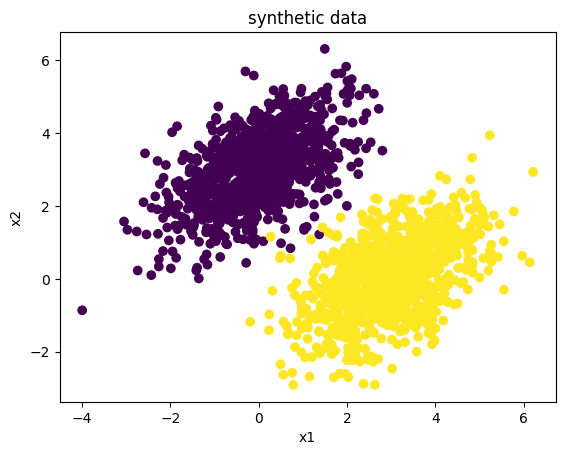

In [4]:
# Plot the input data: negative samples in one color and positive samples in another color
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
# Display the plot
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('synthetic data')

Loss at step 0: 9.0321
Loss at step 1: 1.3720
Loss at step 2: 0.3511
Loss at step 3: 0.1994
Loss at step 4: 0.1670
Loss at step 5: 0.1519
Loss at step 6: 0.1401
Loss at step 7: 0.1297
Loss at step 8: 0.1202
Loss at step 9: 0.1116
Loss at step 10: 0.1038
Loss at step 11: 0.0967
Loss at step 12: 0.0902
Loss at step 13: 0.0843
Loss at step 14: 0.0789
Loss at step 15: 0.0740
Loss at step 16: 0.0696
Loss at step 17: 0.0655
Loss at step 18: 0.0619
Loss at step 19: 0.0585
Loss at step 20: 0.0555
Loss at step 21: 0.0527
Loss at step 22: 0.0502
Loss at step 23: 0.0479
Loss at step 24: 0.0458
Loss at step 25: 0.0439
Loss at step 26: 0.0422
Loss at step 27: 0.0406
Loss at step 28: 0.0392
Loss at step 29: 0.0379
Loss at step 30: 0.0367
Loss at step 31: 0.0356
Loss at step 32: 0.0347
Loss at step 33: 0.0338
Loss at step 34: 0.0330
Loss at step 35: 0.0322
Loss at step 36: 0.0315
Loss at step 37: 0.0309
Loss at step 38: 0.0304
Loss at step 39: 0.0299


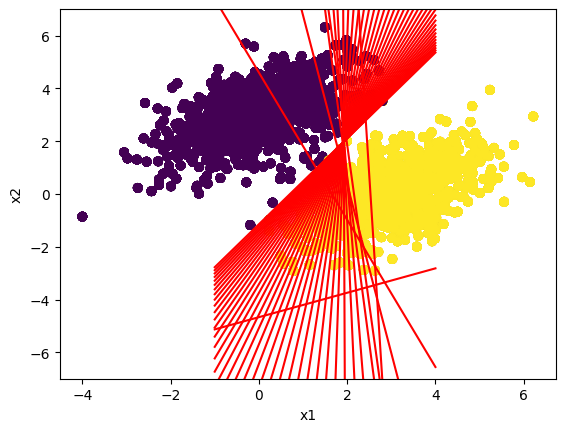

In [5]:
# Define the dimensions of the input and output
input_dim = 2
output_dim = 1

# Initialize the weights and biases for our model
W = tf.Variable(initial_value=tf.random.uniform(minval =0, maxval = 1,
                                                shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

# The model: a simple linear model
def model(inputs):
    # Here our model is y = W1*x1 + W2*x2 + b.
    return tf.matmul(inputs, W) + b

# Define the loss function: square loss
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)  # Squared error
    return tf.reduce_mean(per_sample_losses)   # Mean squared error

# Define the learning rate for our optimization
learning_rate = 0.1

# Training step function
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)  # Forward propogation
        loss = square_loss(targets, predictions)  # Calculating loss
    # Get gradients of loss wrt the weights and biases
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    # Update the weights and biases
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

# Training loop
for step in range(40):
    # Run one training step and get the loss
    loss = training_step(inputs, targets)
    predictions = model(inputs)

    # Plotting the decision boundary and the data
    x1 = np.linspace(-1, 4, 100)
    x2 = - W[0] /  W[1] * x1 + (0.5 - b) / W[1]
    plt.plot(x1, x2, "-r")
    plt.ylim([-7,7])
    plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
    plt.xlabel('x1')
    plt.ylabel('x2')
    # plt.show()

    print(f"Loss at step {step}: {loss:.4f}")

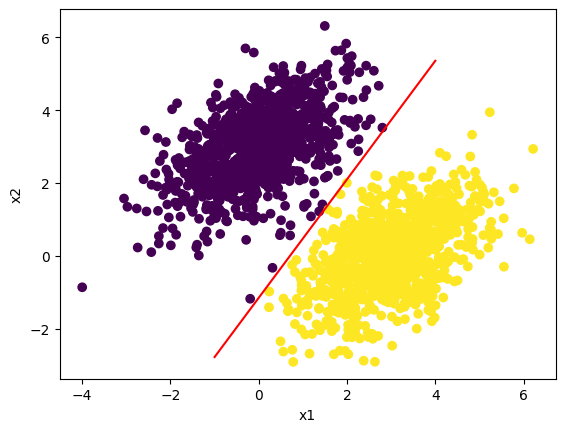

In [6]:
# This line generates 100 evenly spaced numbers over the interval [-1, 4].
# These will serve as our x1 values (horizontal axis) when plotting the decision boundary.
x1 = np.linspace(-1, 4, 100)

# This line calculates the corresponding x2 (vertical axis) values for the decision boundary.
# It's using the formula of the decision boundary we derived in the previous steps.
x2 = - W[0] /  W[1] * x1 + (0.5 - b) / W[1]

plt.plot(x1, x2, "-r") # This plots the decision boundary. The '-r' argument makes the line red.

plt.xlabel('x1') # This sets the label for the x-axis.
plt.ylabel('x2') # This sets the label for the y-axis.


# This plots the individual data points.
# The color of the points is determined by the model's predictions (greater than 0.5 or not).
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)



Confusion Matrix: 
[[999   1]
 [  8 992]]


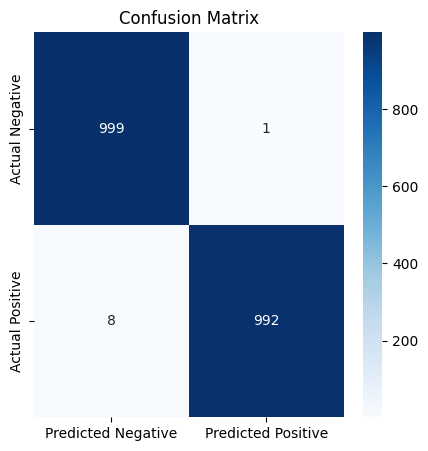

In [11]:
# Import necessary libraries
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# Get the model predictions
predictions = model(inputs)

# Convert targets into a flat array
targets_array = targets.flatten()

# Convert predictions into a flat array
predictions_array = predictions.numpy().flatten()

# Thresholding the predictions at 0.5 (This is equivalent to choosing 0.5 as the decision boundary)
binary_predictions = (predictions_array > 0.5).astype(int)

# Compute the confusion matrix
conf_matrix = confusion_matrix(targets_array, binary_predictions)
print("Confusion Matrix: ")
print(conf_matrix)

# Import necessary library
import seaborn as sns
import pandas as pd

# Convert Confusion Matrix to DataFrame for better visual
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=['Actual Negative', 'Actual Positive'],
                              columns=['Predicted Negative', 'Predicted Positive'])

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

ROC AUC: 0.999902


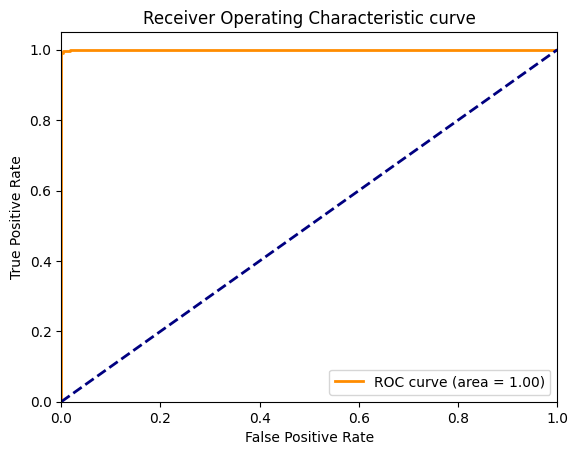

In [12]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(targets_array, predictions_array)

# Compute ROC AUC
roc_auc = roc_auc_score(targets_array, predictions_array)
print(f"ROC AUC: {roc_auc}")

# Plot ROC curve
plt.figure()
lw = 2  # line width
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

# Keras: NNs made easy

In [ ]:
# We import the necessary modules from TensorFlow and Keras. 'keras' is a high-level API for TensorFlow
# 'layers' is used to create layers in our neural network
from tensorflow import keras
from tensorflow.keras import layers

# Defining our model. The model is Sequential, meaning that it is composed of a linear stack of layers.
# It contains two layers.
# The first layer is a dense (or fully connected) layer with 64 nodes (or neurons). The activation function is 'relu'.
# The second layer is also a dense layer with 10 nodes. The activation function here is 'softmax'.
# 'softmax' is typically used in the output layer of a multi-class classification problem, it gives a probability distribution over the output classes.
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
# Here we're initializing our model as a Sequential model again
model = keras.Sequential()
# We're adding the first layer - a dense layer with 64 nodes and 'relu' activation
model.add(layers.Dense(64, activation="relu"))
# We're adding the second layer - a dense layer with 10 nodes and 'softmax' activation
model.add(layers.Dense(10, activation="softmax"))
# Now, we build our model, specifying the input shape. The 'None' in the input shape means it can take any integer value, giving flexibility on the batch size
model.build(input_shape=(None, 3))

In [ ]:
# The model's weights can be accessed and we print the length to show how many tensors of weights we have
print(len(model.weights))
# We can also check the shape of the weights of any layer, here we're checking the shape of weights of the first layer
print(model.weights[0].shape)
# This line is to print the shape of weights and biases of all the layers
print([i.shape for i in model.weights])
# We call model.summary() to get a text summary of the model architecture, which includes layers, output shapes and the number of parameters
print(model.summary())

4
(3, 64)
[TensorShape([3, 64]), TensorShape([64]), TensorShape([64, 10]), TensorShape([10])]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Naming the model and the layers

# We're defining our model with a name 'my_example_model'
model = keras.Sequential(name="my_example_model")
# We're adding the first layer with 64 nodes and 'relu' activation and giving it a name 'my_first_layer'
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
# We're adding the second layer with 10 nodes and 'softmax' activation and giving it a name 'my_last_layer'
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
# We build our model with a flexible input shape
model.build((None, 3))

# We call model.summary() to get a text summary of the model architecture
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# We're initializing our model as a Sequential model again
model = keras.Sequential()

# We're defining the input shape using keras.Input function
model.add(keras.Input(shape=(3,)))

# We're adding a dense layer with 64 nodes and 'relu' activation
model.add(layers.Dense(64, activation="relu"))

# We call model.summary() to get a text summary of the model architecture
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# We're further adding a dense layer (output) with 10 nodes and 'softmax' activation
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
Total params: 1,016
Trainable params: 1,016
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Define the input layer. 'shape' argument specifies the shape of the input data excluding the batch size.
# The 'name' argument assigns a name to this layer.
inputs = keras.Input(shape=(3,), name="my_input")

# Connect a dense layer to the inputs. This layer will have 64 neurons and will use the ReLU activation function.
# When this line is executed, Keras implicitly creates the weight and bias variables of this layer.
# The weights will have the shape (3, 64), and the biases will have the shape (64,).
# The shape of the weights is determined by the number of input features (3 in this case) and the number of neurons in the layer (64 in this case).
# The shape of the biases is determined by the number of neurons in the layer.
features = layers.Dense(64, activation="relu")(inputs)

# Connect another dense layer to the previous layer.
# This layer will have 10 neurons (because we have 10 classes in our problem) and will use the softmax activation function.
# The shape of the weights of this layer will be (64, 10), and the shape of the biases will be (10,).
outputs = layers.Dense(10, activation="softmax")(features)

# Define the model by specifying its inputs and outputs.
# In this case, the model has a single input (the "inputs" layer) and a single output (the "outputs" layer).
model = keras.Model(inputs=inputs, outputs=outputs)

# Print a summary of the model, which includes the number of parameters in each layer and in the whole model.
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_9 (Dense)             (None, 64)                256       
                                                                 
 dense_10 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_9 (Dense)             (None, 64)                256       
                                                                 
 dense_10 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [ ]:
features.shape

TensorShape([None, 64])

# Enter the MNIST

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


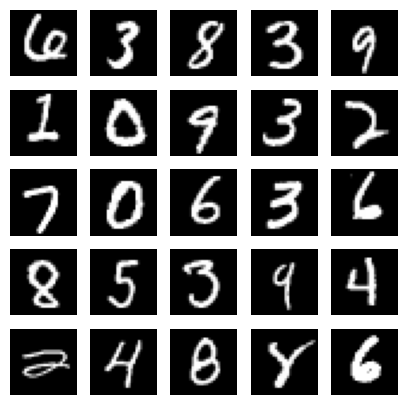

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.savefig("mnist-samples.png")
plt.show()
plt.close('all')

# MNIST MLP

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size

# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [ ]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))

# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the network and record its history.
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=batch_size)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 256)               200960    
                                                                 
 activation_3 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 256)               65792     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 10)               

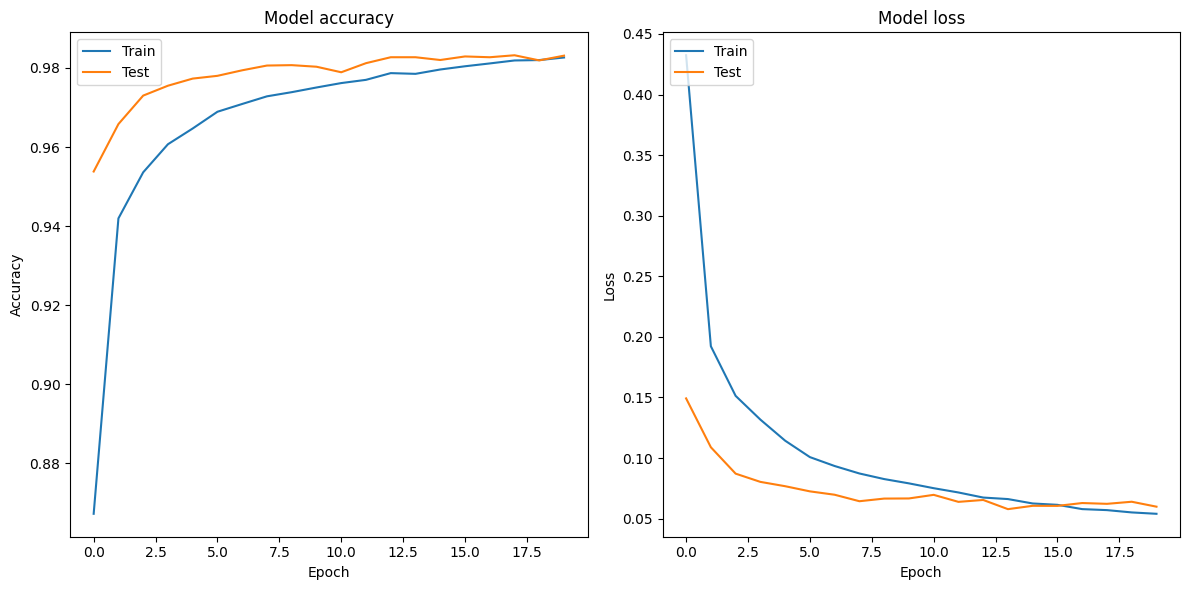

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()
plt.show()

313/313 [==============================] - 1s 3ms/step


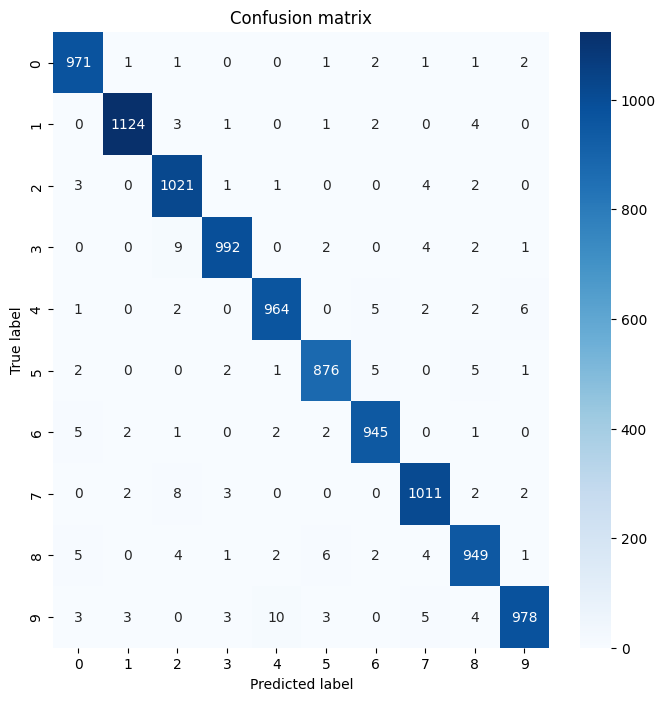

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get model's predictions for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# MNIST DCNN

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# input image dimensions
image_size = x_train.shape[1]

# resize and normalize
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
# image is processed as is (square grayscale)
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

# model is a stack of CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())
# dropout added as regularizer
model.add(Dropout(dropout))
# output layer is 10-dim one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                   verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

# Do features matter?

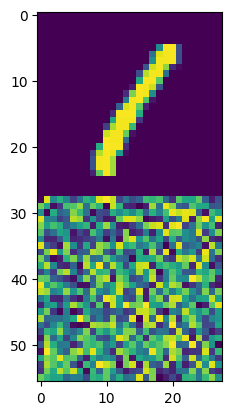

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Loading the MNIST data.
(train_images, train_labels), _ = mnist.load_data()

# Flattening the images and normalizing pixel values to be between 0 and 1.
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

# Concatenating the training images with a random noise channel, essentially doubling the dataset size.
# The second half of the data for each image will just be noise.
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

# Concatenating the training images with a channel of zeros.
# The second half of the data for each image will just be zeros.
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)


train_images_with_noise_channels.shape


# Visualizing one of the noise images
plt.imshow(train_images_with_noise_channels[3].reshape(56,28))

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Defining a function that will create our model.
def get_model():
    # Defining the structure of the model.
    model = keras.Sequential([
        # The first layer of the model is a dense layer with 512 units and 'relu' activation function.
        layers.Dense(512, activation="relu"),
        # The second (output) layer of the model is a dense layer with 10 units and 'softmax' activation function.
        layers.Dense(10, activation="softmax")
    ])
    # Compiling the model with RMSprop optimizer, sparse categorical cross entropy as loss function,
    # and we want to track 'accuracy' metric.
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# Training the model on the noisy data.
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

# Training the model on the zero-channel data.
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 12s 8ms/step - loss: 0.6335 - accuracy: 0.8126 - val_loss: 0.2905 - val_accuracy: 0.9144
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2616 - accuracy: 0.9195 - val_loss: 0.2313 - val_accuracy: 0.9273
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1708 - accuracy: 0.9474 - val_loss: 0.1783 - val_accuracy: 0.9473
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1216 - accuracy: 0.9622 - val_loss: 0.1318 - val_accuracy: 0.9624
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0909 - accuracy: 0.9713 - val_loss: 0.1410 - val_accuracy: 0.9600
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0675 - accuracy: 0.9789 - val_loss: 0.1331 - val_accuracy: 0.9638
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0490 - accuracy: 0.9850 - val_loss: 0.1267 - val_accuracy: 0.9648
Epoch

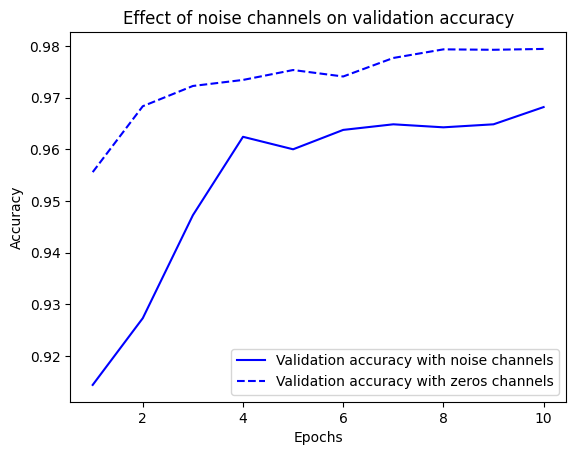

In [ ]:
# Extracting the validation accuracy from the training history for both models.
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]

# The range of epochs we trained for, to be used as the x-axis in the plot.
epochs = range(1, 11)

# Plotting the validation accuracy of the models trained on noisy data and zero-channel data over the epochs.
plt.plot(epochs, val_acc_noise, "b-", label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--", label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#Tuning network structure

In [ ]:
(train_images, train_labels), _ = mnist.load_data()

# Reshaping the images and normalizing pixel values.
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

# Shuffling the labels randomly. The labels no longer match the images.
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

# Building a simple model with one hidden layer and an output layer.
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compiling the model with RMSprop optimizer, sparse categorical cross entropy as loss function,
# and we want to track 'accuracy' metric.
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Training the model on images and randomly shuffled labels.
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

# Making predictions on the train images.
output = model.predict(train_images)

# Checking the shapes of the output.
output.shape
output.argmax(axis = 1).shape

# Checking how often the model's predictions match the shuffled labels.
(output.argmax(axis = 1) == random_train_labels).mean()

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3152 - accuracy: 0.1024 - val_loss: 2.3047 - val_accuracy: 0.1064
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2990 - accuracy: 0.1189 - val_loss: 2.3145 - val_accuracy: 0.1029
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2913 - accuracy: 0.1280 - val_loss: 2.3194 - val_accuracy: 0.1001
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2802 - accuracy: 0.1395 - val_loss: 2.3222 - val_accuracy: 0.1032
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2644 - accuracy: 0.1518 - val_loss: 2.3311 - val_accuracy: 0.1013
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2454 - accuracy: 0.1654 - val_loss: 2.3464 - val_accuracy: 0.1054
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2227 - accuracy: 0.1815 - val_loss: 2.3674 - val_accuracy: 0.1007

0.7534166666666666

In [ ]:
output = model.predict(train_images)
output.shape

1875/1875 [==============================] - 2s 1ms/step


(60000, 10)

In [ ]:
output.argmax(axis = 1).shape

(60000,)

In [ ]:
(output.argmax(axis = 1) == random_train_labels).mean()

0.7524333333333333

In [ ]:
(train_images, train_labels), _ = mnist.load_data()

# Reshaping the images and normalizing pixel values.
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

# Building a simple model with one hidden layer and an output layer.
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compiling the model with RMSprop optimizer with high learning rate (1),
# sparse categorical cross entropy as loss function, and we want to track 'accuracy' metric.
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Training the model on images and their actual labels.
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 549.2534 - accuracy: 0.2872 - val_loss: 2.4340 - val_accuracy: 0.1646
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 2.7165 - accuracy: 0.1963 - val_loss: 2.3371 - val_accuracy: 0.1808
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4747 - accuracy: 0.2154 - val_loss: 2.2272 - val_accuracy: 0.1683
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 2.5609 - accuracy: 0.2048 - val_loss: 2.1378 - val_accuracy: 0.2221
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 2.3961 - accuracy: 0.1901 - val_loss: 2.2564 - val_accuracy: 0.1617
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3338 - accuracy: 0.1779 - val_loss: 2.1906 - val_accuracy: 0.1926
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6153 - accuracy: 0.2119 - val_loss: 2.0702 - val_accuracy: 0.2232
Epoc

In [ ]:
# Building a simple model with one hidden layer and an output layer.
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compiling the model with RMSprop optimizer with low learning rate (1e-2),
# sparse categorical cross entropy as loss function, and we want to track 'accuracy' metric.
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Training the model on images and their actual labels.
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3716 - accuracy: 0.9089 - val_loss: 0.1425 - val_accuracy: 0.9603
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1241 - accuracy: 0.9654 - val_loss: 0.1330 - val_accuracy: 0.9649
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0937 - accuracy: 0.9746 - val_loss: 0.1356 - val_accuracy: 0.9692
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0781 - accuracy: 0.9793 - val_loss: 0.1491 - val_accuracy: 0.9693
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0676 - accuracy: 0.9830 - val_loss: 0.1490 - val_accuracy: 0.9730
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0562 - accuracy: 0.9856 - val_loss: 0.1640 - val_accuracy: 0.9722
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0541 - accuracy: 0.9865 - val_loss: 0.2024 - val_accuracy: 0.9735
Epoch 

In [ ]:
# Building a very simple model with only an output layer.
model = keras.Sequential([layers.Dense(10, activation="softmax")])

# Compiling the model with RMSprop optimizer, sparse categorical cross entropy as loss function,
# and we want to track 'accuracy' metric.
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Training the model on images and their actual labels.
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 0.6552 - accuracy: 0.8388 - val_loss: 0.3630 - val_accuracy: 0.9013
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3530 - accuracy: 0.9032 - val_loss: 0.3125 - val_accuracy: 0.9142
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3181 - accuracy: 0.9112 - val_loss: 0.2953 - val_accuracy: 0.9178
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3019 - accuracy: 0.9152 - val_loss: 0.2840 - val_accuracy: 0.9202
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2920 - accuracy: 0.9189 - val_loss: 0.2794 - val_accuracy: 0.9216
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2858 - accuracy: 0.9199 - val_loss: 0.2751 - val_accuracy: 0.9238
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2804 - accuracy: 0.9223 - val_loss: 0.2733 - val_accuracy: 0.9255
Epoch 

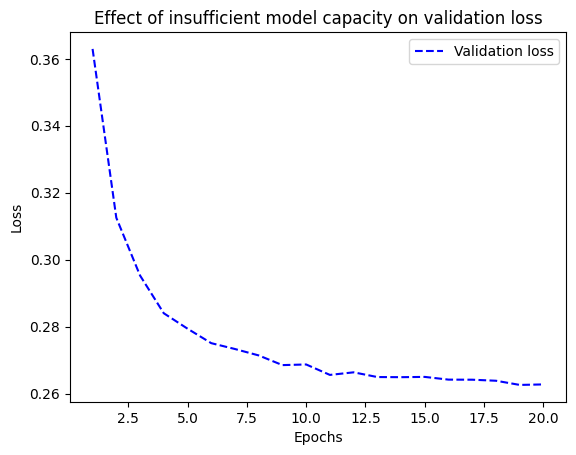

In [ ]:
import matplotlib.pyplot as plt

# Plotting the validation loss of the model with insufficient capacity.
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Building a larger model with two hidden layers and an output layer.
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

# Compiling the model with RMSprop optimizer, sparse categorical cross entropy as loss function,
# and we want to track 'accuracy' metric.
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Training the model on images and their actual labels.
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3636 - accuracy: 0.8967 - val_loss: 0.1765 - val_accuracy: 0.9490
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1608 - accuracy: 0.9526 - val_loss: 0.1397 - val_accuracy: 0.9599
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1126 - accuracy: 0.9665 - val_loss: 0.1217 - val_accuracy: 0.9640
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0881 - accuracy: 0.9735 - val_loss: 0.1085 - val_accuracy: 0.9679
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0708 - accuracy: 0.9788 - val_loss: 0.0973 - val_accuracy: 0.9715
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0581 - accuracy: 0.9824 - val_loss: 0.0907 - val_accuracy: 0.9729
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0482 - accuracy: 0.9849 - val_loss: 0.0902 - val_accuracy: 0.9730
Epoch 

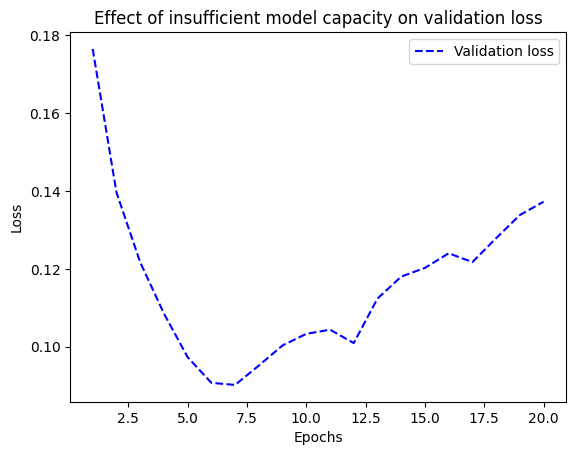

In [ ]:
import matplotlib.pyplot as plt

# Plotting the validation loss of the larger model.
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()